<a href="https://colab.research.google.com/github/ashaduzzaman-sarker/Image-Classification-with-CIFAR-10/blob/main/Image_Classification_with_CIFAR_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Image Classification with CIFAR-10

**CIFAR-10 Dataset:**

The CIFAR-10 dataset stands as a prominent benchmark within the realm of machine learning, particularly tailored for image classification tasks. Consisting of 60,000 color images, each sized at 32x32 pixels, the dataset is segregated into 10 distinct categories, each representing various objects or animals. These categories include:

1. Airplane
2. Automobile
3. Bird
4. Cat
5. Deer
6. Dog
7. Frog
8. Horse
9. Ship
10. Truck

Each category is evenly populated with 6,000 images. Out of the total image pool, 50,000 are allocated for training purposes, while the remaining 10,000 are reserved for testing.

**Table of Contents:**
1.
2.
3.


## Data Preparation

### Import necessary libraries

In [1]:
# import time

# # Run a while loop indefinitely
# while True:
#     print("Notebook is running...")
#     time.sleep(60)  # Wait for 60 seconds before printing again

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

###Load the CIFAR-10 dataset

In [3]:
import os
import tensorflow as tf
import tensorflow_datasets as tfds
from keras.models import load_model
from keras.datasets import cifar10

In [4]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

In [6]:
print('Training Images Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)

print('\nValidation Images Shape:', X_valid.shape)
print('Validation Labels Shape:', y_valid.shape)

print('\nTesting Images Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)

Training Images Shape: (45000, 32, 32, 3)
Training Labels Shape: (45000, 1)

Validation Images Shape: (5000, 32, 32, 3)
Validation Labels Shape: (5000, 1)

Testing Images Shape: (10000, 32, 32, 3)
Testing Labels Shape: (10000, 1)


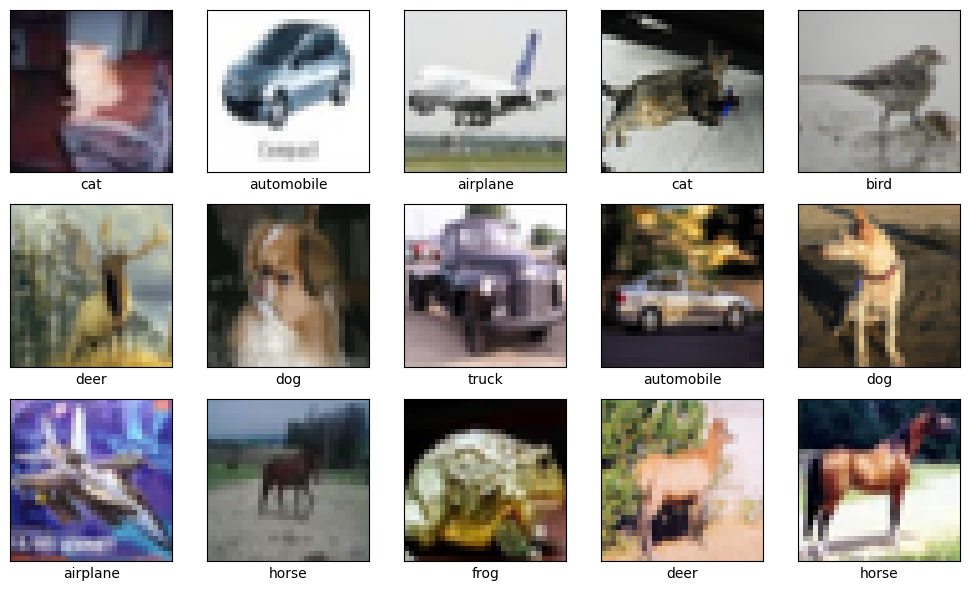

In [7]:
# CIFAR-10 Visualize data
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10, 6))

for i in range(15):
    plt.subplot(3, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

    plt.imshow(X_train[i])
    plt.xlabel(class_names[y_train[i][0]])

plt.tight_layout()

plt.show()

## Data Preprocessing:
- Normalization of Image Data
- One-Hot Encoding of Labels
- Data Augmentation

In [8]:
## Normalization of Image Data

# Convert pixel values data type to float32
X_train = X_train.astype('float32')
X_test  = X_test.astype('float32')
X_valid = X_valid.astype('float32')

# Calculate the mean and standard deviation of the training images
train_mean = np.mean(X_train)
train_std  = np.std(X_train)

# Normalize the data
# The tiny value 1e-7 is added to prevent division by zero
X_train = (X_train - train_mean) / (train_std + 1e-7)
X_test  = (X_test - train_mean) / (train_std + 1e-7)
X_valid = (X_valid - train_mean) / (train_std + 1e-7)

In [9]:
## One-Hot Encoding of Labels
from tensorflow.keras.utils import to_categorical

# Convert class vectors to binary class matrices
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_valid = to_categorical(y_valid, num_classes)
y_test = to_categorical(y_test, num_classes)

In [10]:
## Data augmentation configuration(Optional)
from tensorflow.keras.preprocessing.image import ImageDataGenerator

data_generator = ImageDataGenerator(
    rotation_range=15,  # Rotate images randomly by up to 15 degrees
    width_shift_range=0.12, # Shift images horizontally by up to 12% of their width
    height_shift_range=0.12, # Shift images vertically by up to 12% of their height
    horizontal_flip=True, # Randomly flip images horizontally
    zoom_range=0.1, # Zoom images in by up to 10%
    brightness_range=[0.9, 1.1], # Adjust brightness by up to 10%
    shear_range=10, # Shear intensity (counter-clockwise)
    channel_shift_range=0.1 # Channel shift intensity
)

# Fit the data augmentation generator
data_generator.fit(X_train)


##Building Baseline CNN Model

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2

In [12]:
X_train.shape[1:]

(32, 32, 3)

In [13]:
# Create CNN Model
def get_model():
  model = Sequential()

  weight_decay = 0.0001

  model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu', kernel_regularizer=l2(weight_decay), input_shape=(32, 32, 3)))
  model.add(BatchNormalization())
  model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu', kernel_regularizer=l2(weight_decay)))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(rate=0.2))

  model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu', kernel_regularizer=l2(weight_decay)))
  model.add(BatchNormalization())
  model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu', kernel_regularizer=l2(weight_decay)))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(rate=0.2))

  model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu', kernel_regularizer=l2(weight_decay)))
  model.add(BatchNormalization())
  model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu', kernel_regularizer=l2(weight_decay)))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(rate=0.2))

  model.add(Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu', kernel_regularizer=l2(weight_decay)))
  model.add(BatchNormalization())
  model.add(Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu', kernel_regularizer=l2(weight_decay)))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(rate=0.2))

  model.add(Flatten())
  model.add(BatchNormalization())
  model.add(Dropout(0.5))
  model.add(Dense(512, activation='relu'))
  model.add(Dense(10, activation='softmax'))

  return model


In [14]:
model = get_model()

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                        

##Training the CNN Model

In [16]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

In [17]:
# Set hyperparameters
batch_size = 64
epochs = 10  #300

# Define optimizer
optimizer = Adam(learning_rate=0.0005)

In [18]:
# Compile the model
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [19]:
# Define callbacks
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, min_lr=0.00001)
early_stopping = EarlyStopping(monitor='val_loss', patience=40, restore_best_weights=True, verbose=1)

In [20]:
# Train the model
history = model.fit(data_generator.flow(X_train, y_train, batch_size=batch_size),
                    epochs=epochs,
                    validation_data=(X_valid, y_valid),
                    callbacks=[reduce_lr, early_stopping],
                    verbose=2)

Epoch 1/10
704/704 - 536s - loss: 1.9957 - accuracy: 0.3533 - val_loss: 1.5531 - val_accuracy: 0.5008 - lr: 5.0000e-04 - 536s/epoch - 761ms/step
Epoch 2/10
704/704 - 521s - loss: 1.5460 - accuracy: 0.4821 - val_loss: 1.4274 - val_accuracy: 0.5416 - lr: 5.0000e-04 - 521s/epoch - 741ms/step
Epoch 3/10
704/704 - 539s - loss: 1.3363 - accuracy: 0.5582 - val_loss: 1.3596 - val_accuracy: 0.5620 - lr: 5.0000e-04 - 539s/epoch - 766ms/step
Epoch 4/10
704/704 - 530s - loss: 1.1917 - accuracy: 0.6126 - val_loss: 1.0241 - val_accuracy: 0.6636 - lr: 5.0000e-04 - 530s/epoch - 753ms/step
Epoch 5/10
704/704 - 536s - loss: 1.1037 - accuracy: 0.6475 - val_loss: 0.9545 - val_accuracy: 0.7012 - lr: 5.0000e-04 - 536s/epoch - 761ms/step
Epoch 6/10
704/704 - 535s - loss: 1.0276 - accuracy: 0.6784 - val_loss: 0.9811 - val_accuracy: 0.6934 - lr: 5.0000e-04 - 535s/epoch - 760ms/step
Epoch 7/10
704/704 - 541s - loss: 0.9716 - accuracy: 0.7007 - val_loss: 0.8794 - val_accuracy: 0.7388 - lr: 5.0000e-04 - 541s/epoc

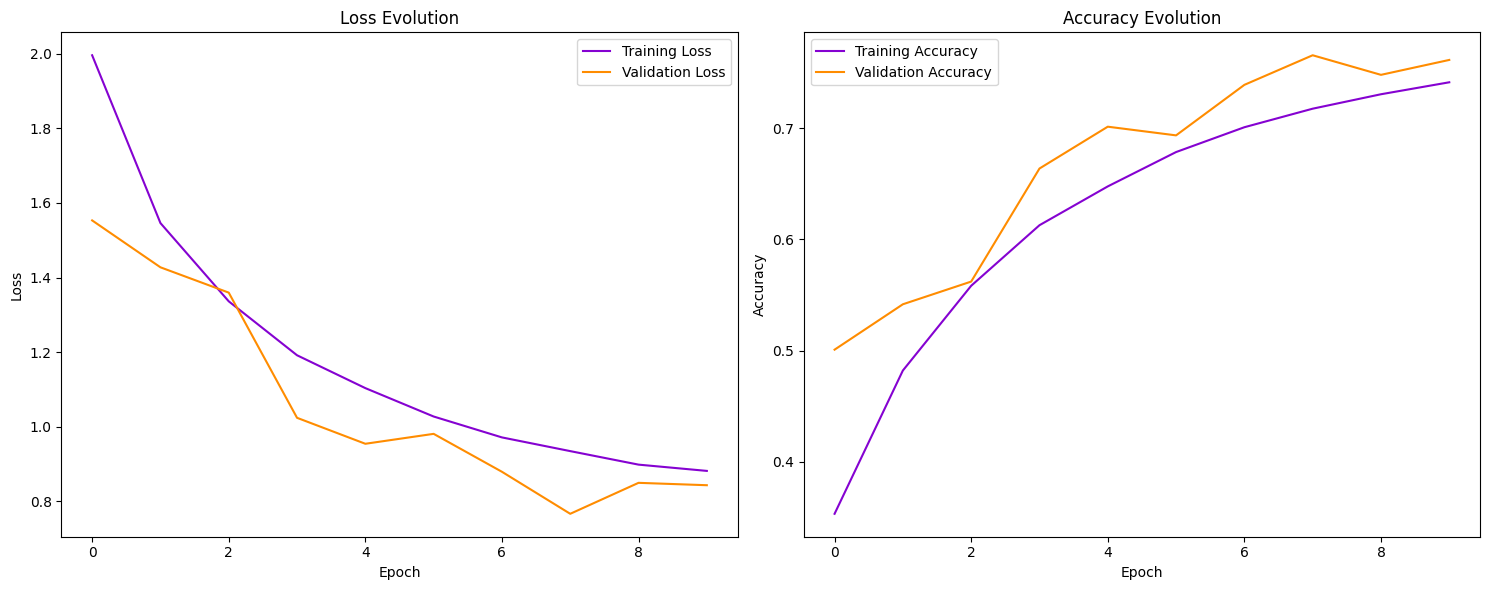

In [21]:
# Set figure size
plt.figure(figsize=(15, 6))

# Plotting the training and validation loss
plt.subplot(1, 2, 1)
plt.plot(model.history.history['loss'], label='Training Loss', color='#8502d1')
plt.plot(model.history.history['val_loss'], label='Validation Loss', color='darkorange')
plt.legend()
plt.title('Loss Evolution')
plt.xlabel('Epoch')
plt.ylabel('Loss')

# Plotting the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(model.history.history['accuracy'], label='Training Accuracy', color='#8502d1')
plt.plot(model.history.history['val_accuracy'], label='Validation Accuracy', color='darkorange')
plt.legend()
plt.title('Accuracy Evolution')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()

##Evaluating the Optimal Model on Test Data

In [22]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)

# Print the test accuracy and loss
print('\nTest Accuracy:', test_accuracy)
print('Test Loss:    ', test_loss)

313/313 [==============================] - 26s 83ms/step - loss: 0.8740 - accuracy: 0.7513

Test Accuracy: 0.7512999773025513
Test Loss:     0.8740367889404297


In [23]:
model.save('CIFAR-10.h5')

##Performance on an Out-of-Dataset Image

In [24]:
import urllib.request
import cv2
import numpy as np
import matplotlib.pyplot as plt

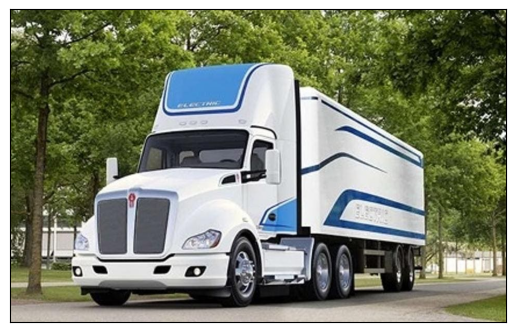

In [25]:
# Fetch the raw image from the URL
url_link = 'https://imageio.forbes.com/specials-images/imageserve/65e78e86cf5a75980af87251/Class-8-short-haul-tractor-truck-with-attached-trailer--Source--PowerProgress-com/960x0.jpg?format=jpg&width=960'
resp = urllib.request.urlopen(url_link)
image = np.asarray(bytearray(resp.read()), dtype="uint8")

# Decode the image
image = cv2.imdecode(image, cv2.IMREAD_COLOR)

# Convert the image from BGR to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image
plt.imshow(image_rgb)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.show()

In [26]:
# Resize the image to 32x32 pixels
image_resized = cv2.resize(image_rgb, (32, 32))

# Normalize the image
mean = np.mean(image_resized)
std = np.std(image_resized)
image_normalized = (image_resized - mean) / (std + 1e-7)

# Add an extra dimension because the model expects a batch of images
image_final = np.expand_dims(image_normalized, axis=0)

In [27]:
# Make a prediction using the model
prediction = model.predict(image_final)
predicted_class = prediction.argmax()

# Map the predicted class index to its corresponding label
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
predicted_label = class_names[predicted_class]

print('Predicted class: ', predicted_label)

1/1 [==============================] - 0s 304ms/step
Predicted class:  truck


## Model Improvements Using a Pretrained Model VGG16

In [28]:
from tensorflow.keras.applications.vgg16 import VGG16

In [29]:
# Load the pre-trained VGG16 model
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(32,32,3))
vgg_model.summary()

58889256/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                              

In [30]:
# Freeze the layers in the base model
for layer in vgg_model.layers:
  layer.trainable = False

vgg_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [31]:
# Create a new model on top of the pre-trained base model
def trained_model():
  model = Sequential()
  model.add(vgg_model)
  model.add(Flatten())
  model.add(Dense(512, activation='relu'))
  model.add(Dense(10, activation='softmax'))

  return model

In [32]:
model = trained_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 512)               262656    
                                                                 
 dense_3 (Dense)             (None, 10)                5130      
                                                                 
Total params: 14982474 (57.15 MB)
Trainable params: 267786 (1.02 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [33]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [34]:
# Train the model
history = model.fit(X_train, y_train, batch_size=128, epochs=10, validation_data=(X_valid, y_valid))
history

Epoch 1/10
352/352 [==============================] - 582s 2s/step - loss: 1.1630 - accuracy: 0.5957 - val_loss: 1.0325 - val_accuracy: 0.6426
Epoch 2/10
352/352 [==============================] - 600s 2s/step - loss: 0.9653 - accuracy: 0.6618 - val_loss: 1.0053 - val_accuracy: 0.6430
Epoch 3/10
352/352 [==============================] - 574s 2s/step - loss: 0.8853 - accuracy: 0.6897 - val_loss: 0.9580 - val_accuracy: 0.6648
Epoch 4/10
352/352 [==============================] - 592s 2s/step - loss: 0.8189 - accuracy: 0.7145 - val_loss: 0.9583 - val_accuracy: 0.6668
Epoch 5/10
352/352 [==============================] - 592s 2s/step - loss: 0.7541 - accuracy: 0.7348 - val_loss: 0.9380 - val_accuracy: 0.6750
Epoch 6/10
352/352 [==============================] - 601s 2s/step - loss: 0.6927 - accuracy: 0.7604 - val_loss: 0.9290 - val_accuracy: 0.6834
Epoch 7/10
352/352 [==============================] - 594s 2s/step - loss: 0.6334 - accuracy: 0.7809 - val_loss: 0.9555 - val_accuracy: 0.6808

In [35]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)

# Print the test accuracy and loss
print('\nTest Accuracy:', test_accuracy)
print('Test Loss:    ', test_loss)

313/313 [==============================] - 116s 372ms/step - loss: 1.0175 - accuracy: 0.6721

Test Accuracy: 0.6721000075340271
Test Loss:     1.017526626586914


In [36]:
# Save the model to disk
model.save('VGG_CIFAR-10.h5')

In [44]:
# Fetch the raw image from the URL
url_link = 'https://upload.wikimedia.org/wikipedia/commons/thumb/b/bc/Juvenile_Ragdoll.jpg/800px-Juvenile_Ragdoll.jpg'
resp = urllib.request.urlopen(url_link)
image = np.asarray(bytearray(resp.read()), dtype="uint8")

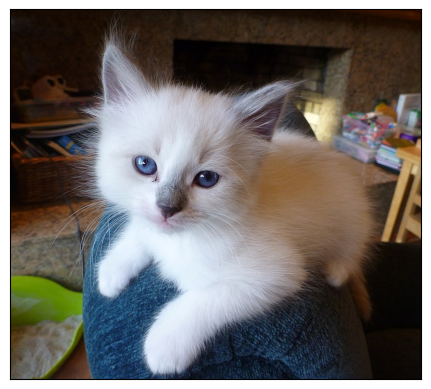

In [45]:
# Decode the image
image = cv2.imdecode(image, cv2.IMREAD_COLOR)

# Convert the image from BGR to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image
plt.imshow(image_rgb)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.show()

In [46]:
# Resize the image to 32x32 pixels
image_resized = cv2.resize(image_rgb, (32, 32))

# Normalize the image
mean = np.mean(image_resized)
std = np.std(image_resized)
image_normalized = (image_resized - mean) / (std + 1e-7)

# Add an extra dimension because the model expects a batch of images
image_final = np.expand_dims(image_normalized, axis=0)

In [47]:
# Make a prediction using the model
prediction = model.predict(image_final)
predicted_class = prediction.argmax()

1/1 [==============================] - 0s 45ms/step


In [48]:
# Map the predicted class index to its corresponding label
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
predicted_label = class_names[predicted_class]

print('Predicted class: ', predicted_label)

Predicted class:  dog


##Model Improvements Using a Pretrained Model MobileNet-V3

## Model Improvements Using a Pretrained Model Inception-V3